In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv("./digit_data.csv")

In [161]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
data.iloc[1, 1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [163]:
np.array(data.iloc[1, 1:]).reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  30, 137,
        137, 192,  86,  72,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254,
        254, 254, 217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

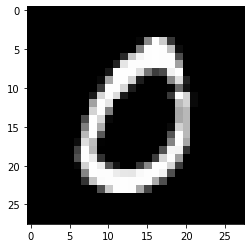

In [164]:
plt.imshow(np.array(data.iloc[int(np.random.random() * data.shape[0]), 1:]).reshape((28,28)), cmap="gray")

In [165]:
data = np.array(data)
m, n = data.shape

In [166]:
m,n

(42000, 785)

In [167]:
np.random.shuffle(data)

In [186]:
data_test = data[:1000].T
test_y = data_test[0]
test_x = data_test[1:n]

In [187]:
data_train = data[1000:].T
train_y = data_train[0]
train_x = data_train[1:n]

In [188]:
np.random.seed(0)

In [334]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):

        # self.weights = np.random.randn(n_inputs, n_neurons)
        self.weights = np.random.random((n_inputs, n_neurons)) - 0.5

        # self.biases = np.zeros(1, n_neurons)
        self.biases = np.random.random((1, n_neurons)) - 0.5

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights)  + self.biases


    def backpropagation(self, output_error, lr):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.inputs.T, output_error)

        self.weights -= lr * weights_error
        self.bias -= lr * output_error
        return input_error


In [247]:
class Activations:

    def ReLU(self, inputs):
        return np.maximum(0, inputs)

    def ReLU_derivative(self, inputs):
        return (inputs > 0) * 1
            
    def Sigmoid(self, inputs):
        return (1 / 1 + np.exp(-inputs))
        
    def Sigmoid_derivative(self, inputs):
        return (1 / 1 + np.exp(-inputs))*(1- (1 / 1 + np.exp(-inputs)))

    def SoftMax(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        return exp_values/ np.sum(exp_values)

    def SoftMax_derivative(self):
        raise NotImplementedError

In [275]:
class LossFunction:
    def MSE(self, true_values, predicted_values):
        return np.mean(np.square(true_values - predicted_values))
    def sparse_categorical_crossentropy(self, true_values, predicted_values):
        # The predicted values come from the softmax
        return -np.sum(true_values + np.log(predicted_values))

In [249]:
activation = Activations()

In [250]:
layer1 = Layer_Dense(784, 10)
layer2 = Layer_Dense(10, 2)

In [251]:
train_x[:,0].shape

(784,)

In [252]:
train_x[:,0:2].shape

(784, 2)

In [265]:
layer1.forward(train_x[:,0:1].T)

In [266]:
layer1.output

array([[-596.96658497, -462.47427404,  689.48328394,  311.09110403,
         156.43275582,  460.03742803, 1071.57903503,  112.95009842,
         798.45417041,  556.58613587]])

In [267]:
layer1.output[0]

array([-596.96658497, -462.47427404,  689.48328394,  311.09110403,
        156.43275582,  460.03742803, 1071.57903503,  112.95009842,
        798.45417041,  556.58613587])

In [268]:
activation1 = activation.SoftMax(layer1.output)

In [271]:
activation1.sum()

1.0

In [258]:
layer2.forward(activation1)

In [259]:
layer2.output

array([[  89.73320551, -395.01224706],
       [-117.12179805, -244.45749081]])

In [273]:
y_pred = np.array([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1], [0.3, 0.4, 0.3]])
np.amax(y_pred, axis=1, keepdims=True)

array([[0.7],
       [0.8],
       [0.4]])

Coursera Implementation

In [337]:
np.random.seed(0)

In [341]:
def initialize_parameters(layer_dims):
    """Layer dims contains the dimension of each layer in the neural network"""
    parameters = {}

    num_layers = len(layer_dims) # as the input layer is taken as 0
    for i in range(1, num_layers):
        parameters[f"W{i}"] = np.random.random((layer_dims[i-1], layer_dims[i])) - 0.5
        parameters[f"b{i}"] = np.random.random((1, layer_dims[i])) - 0.5

    return parameters


In [342]:
initialize_parameters([3, 10, 5])

{'W1': array([[ 0.0488135 ,  0.21518937,  0.10276338,  0.04488318, -0.0763452 ,
          0.14589411, -0.06241279,  0.391773  ,  0.46366276, -0.11655848],
        [ 0.29172504,  0.02889492,  0.06804456,  0.42559664, -0.42896394,
         -0.4128707 , -0.4797816 ,  0.33261985,  0.27815675,  0.37001215],
        [ 0.47861834,  0.29915856, -0.03852064,  0.28052918, -0.38172557,
          0.13992102, -0.35664671,  0.44466892,  0.02184832, -0.08533806]]),
 'b1': array([[-0.23544439,  0.27423369, -0.04384967,  0.06843395, -0.4812102 ,
          0.1176355 ,  0.11209572,  0.116934  ,  0.44374808,  0.1818203 ]]),
 'W2': array([[-0.1404921 , -0.06296805,  0.1976312 , -0.43977453,  0.16676672],
        [ 0.17063787, -0.28961744, -0.3710737 , -0.18457165, -0.13628923],
        [ 0.07019677, -0.06139849,  0.48837384, -0.39795519, -0.29112324],
        [-0.33869048,  0.15310833, -0.2467084 , -0.03368923, -0.25557441],
        [-0.34103042, -0.38962486,  0.15632959, -0.36181705, -0.30341764],
       

In [343]:
def forward(A, weights, biases):
    cache = A, weights, biases
    return np.doT(weights, A) + biases, cache

In [346]:
def mean_squared_error(y_true, y_pred):
    n = y_true.shape[0]
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def mse_gradient(y_true, y_pred):
    n = y_true.shape[0]
    mse_grad = -2 * (y_true - y_pred) / n
    return mse_grad

In [348]:
def sparse_categorical_crossentropy(y_true, logits):
    # y_true is an integer array containing the true class indices (not one-hot encoded)
    n = y_true.shape[0]
    softmax_output = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    # Clip softmax_output to avoid numerical instability (e.g., log(0) = -inf)
    epsilon = 1e-15
    softmax_output = np.clip(softmax_output, epsilon, 1 - epsilon)
    crossentropy = -np.log(softmax_output[np.arange(n), y_true])
    return crossentropy.mean()

def sparse_categorical_crossentropy_gradient(y_true, logits):
    n = y_true.shape[0]
    softmax_output = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    softmax_output[np.arange(n), y_true] -= 1
    softmax_output /= n
    return softmax_output

In [347]:
def backpropagation(dz, cache):
    A_prev, weights, baises = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db